<a href="https://colab.research.google.com/github/Meenzm/AIProject/blob/main/Code_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1120 - loss: 2.3667 - val_accuracy: 0.1700 - val_loss: 2.1792
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2265 - loss: 2.1038 - val_accuracy: 0.2475 - val_loss: 1.9450
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2558 - loss: 1.8050 - val_accuracy: 0.3500 - val_loss: 1.6363
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4234 - loss: 1.5141 - val_accuracy: 0.5075 - val_loss: 1.3807
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5320 - loss: 1.2774 - val_accuracy: 0.6050 - val_loss: 1.1617
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6694 - loss: 1.0771 - val_accuracy: 0.7225 - val_loss: 1.0110
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7544 - loss: 0.9288 - val_accuracy: 0.7625 - val_loss: 0.8754
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8232 - loss: 0.8074 - val_accuracy: 0.8525 - val_

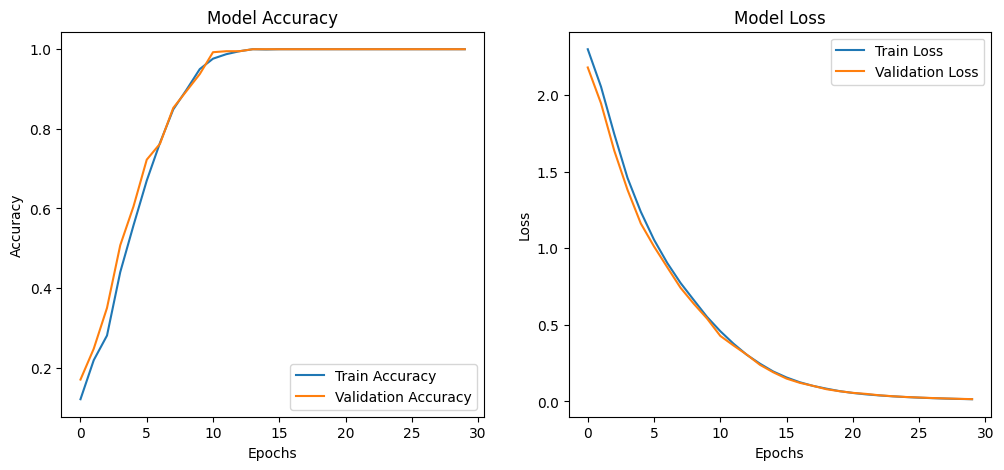

13/13 - 0s - 10ms/step - accuracy: 1.0000 - loss: 0.0149

Final Test Accuracy: 1.0000
Final Test Loss: 0.0149


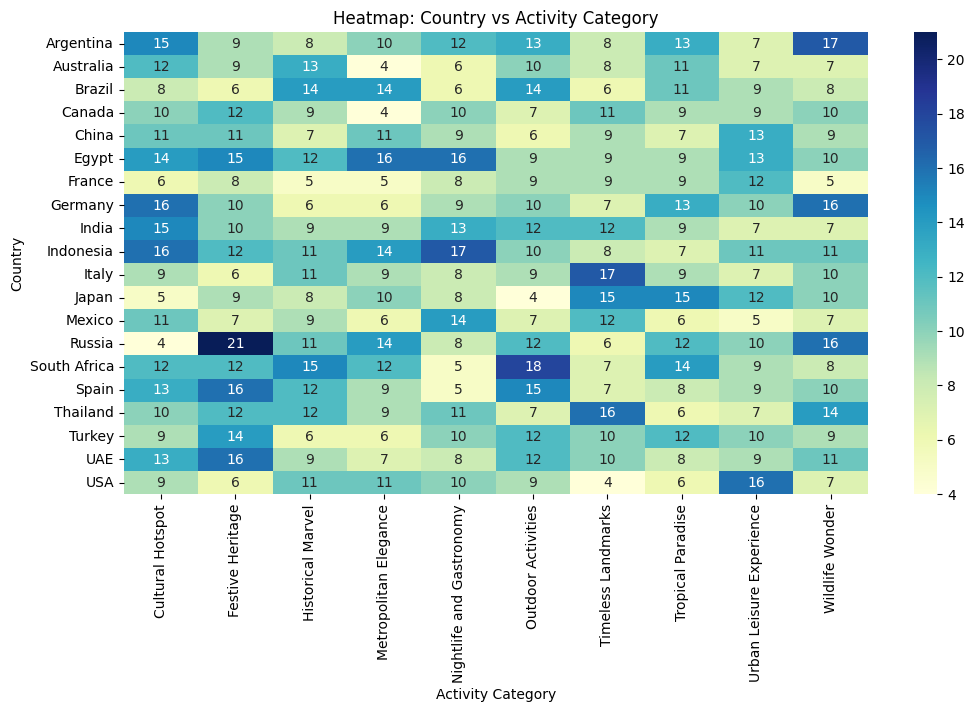

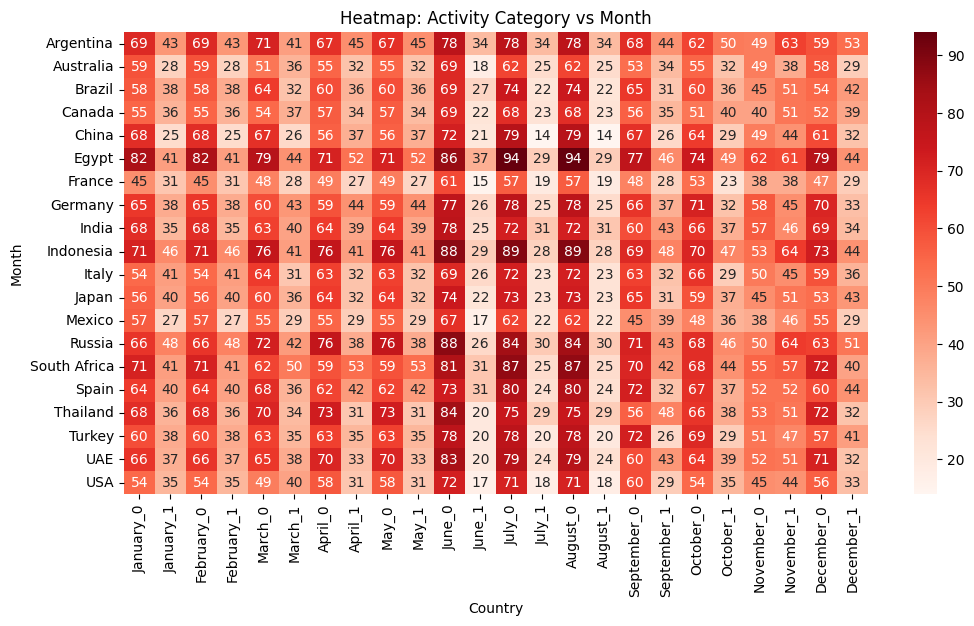

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Predictions:
ไป Egypt เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Turkey เพื่อทำกิจกรรม: Nightlife and Gastronomy
ไป Egypt เพื่อทำกิจกรรม: Urban Leisure Experience
ไป Japan เพื่อทำกิจกรรม: Urban Leisure Experience
ไป Mexico เพื่อทำกิจกรรม: Metropolitan Elegance
ไป China เพื่อทำกิจกรรม: Cultural Hotspot
ไป Italy เพื่อทำกิจกรรม: Tropical Paradise
ไป Spain เพื่อทำกิจกรรม: Metropolitan Elegance
ไป China เพื่อทำกิจกรรม: Wildlife Wonder
ไป Thailand เพื่อทำกิจกรรม: Urban Leisure Experience


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# โหลดไฟล์ CSV
file_path = "Updated_Tourist_OneHot_YearRound_Corrected.csv"
df = pd.read_csv(file_path)

# กำหนดคอลัมน์ที่ไม่ใช่ตัวเลข
non_numeric_cols = ['Destination', 'Country', 'Famous Attraction', 'Attractive Activities', 'Activity Category']

# แปลงข้อความเป็นตัวเลขด้วย Label Encoding
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # เก็บ Encoder ไว้ใช้ภายหลัง

# One-Hot Encoding สำหรับเดือน
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
df = pd.get_dummies(df, columns=months)

# กำหนด Features และ Target
X = df.drop(columns=['Activity Category'])  # ฟีเจอร์
y = df['Activity Category']  # Target

# ปรับค่า Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# แบ่งข้อมูลเป็น Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# สร้างโมเดล FNN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

# คอมไพล์โมเดล
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# เทรนโมเดล
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=16, verbose=1)

# พล็อตกราฟ Accuracy และ Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# ประเมินผลลัพธ์
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"Final Test Loss: {loss:.4f}")

# สร้าง Heatmap: ความนิยมของกิจกรรมในแต่ละประเทศ
heatmap1_data = df.pivot_table(index="Country", columns="Activity Category", aggfunc="size", fill_value=0)

# แปลงตัวเลขของ Country กลับเป็นชื่อประเทศ
heatmap1_data.index = label_encoders['Country'].inverse_transform(heatmap1_data.index)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap1_data, cmap="YlGnBu", annot=True, fmt="d", xticklabels=label_encoders['Activity Category'].classes_)
plt.title("Heatmap: Country vs Activity Category")
plt.xlabel("Activity Category")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.show()

# Heatmap: ความนิยมของประเทศในแต่ละเดือน
month_cols = [col for col in df.columns if any(month in col for month in months)]
heatmap2_data = df.groupby("Country")[month_cols].sum()

# แปลงตัวเลขของ Country กลับเป็นชื่อประเทศ
heatmap2_data.index = label_encoders['Country'].inverse_transform(heatmap2_data.index)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap2_data, cmap="Reds", annot=True, fmt="d")
plt.title("Heatmap: Activity Category vs Month")
plt.xlabel("Country")
plt.ylabel("Month")
plt.xticks(rotation=90)
plt.show()

# ทำนายค่าจาก X_test
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# กำหนด sample size
sample_size = 10

# เลือก sample แบบสุ่มจาก X_test
sample_indices = np.random.choice(len(X_test), sample_size, replace=False)

print("Predictions:")
for idx in sample_indices:
    # แปลงค่าจาก LabelEncoder ให้กลับเป็นชื่อประเทศ
    country = label_encoders['Country'].inverse_transform([df.iloc[idx]['Country']])[0]
    # แปลงค่าจาก predicted_labels ให้กลับเป็นชื่อกิจกรรม
    activity = label_encoders['Activity Category'].inverse_transform([predicted_labels[idx]])[0]
    print(f"ไป {country} เพื่อทำกิจกรรม: {activity}")
